In [1]:
from pathlib import Path
import pandas as pd
from model import *
from utils import get_train_transform, get_device, set_seed
from torchvision import models
import timm
import matplotlib.pyplot as plt
set_seed()

RandomState(MT19937) at 0x217AEB15488

In [2]:
root_dir = Path.cwd()
data_dir = root_dir.joinpath('data')
img_dir = data_dir.joinpath('train')

In [3]:
df = pd.read_csv(data_dir.joinpath('train_labels.csv'))
dataset = SetiDataset(df, img_dir)

In [51]:
pos_idx = []
for i in range(dataset.__len__()):
    _, label = dataset.__getitem__(i)
    if label > 0.5:
        pos_idx.append(i)

KeyboardInterrupt: 

True label is 1.0


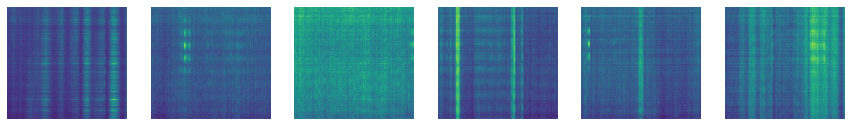

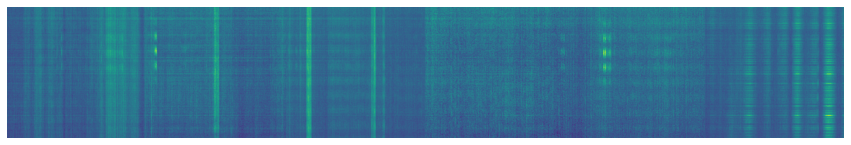

In [79]:
img, label = dataset.__getitem__(pos_idx[12])
_, ax = plt.subplots(1, img.shape[0], figsize=(15, 10))
for i, ch in enumerate(img):
    ax[i].imshow(np.rot90(ch, k=-1, axes=(0,1)))
    ax[i].axis('off')
cat_img = np.rot90(img.reshape(1, -1, 256), k=-1, axes=(1,2))
plt.figure(figsize=(15, 10))
plt.imshow(cat_img[0])
plt.axis('off')
print(f'True label is {label}')

In [6]:
device = get_device()

In [7]:
#densenet = models.densenet121(pretrained=True)
#resnext = models.resnext50_32x4d(pretrained=True)
efficientnet = timm.create_model('efficientnet_b0', pretrained=True)
net = DoubleNet(efficientnet)
path2weights = str(root_dir.joinpath('default_weights'))
torch.save(net.state_dict(), path2weights)

In [8]:
loss = weighted_bce(df)
train_transform = get_train_transform()

In [9]:
config = TrainGlobalConfig
config.batch_size = 32
config.n_epochs = 25
config.folds = 6
config.lr = 3e-4

In [10]:
fitter = Fitter(net=net, path2weights=path2weights, now_device=device, config=config, loss=loss)

Fitter prepared. Device is cuda


In [ ]:
fitter.fit_crossval(dataset, transform=train_transform)

START NEW FOLD
Time: 2021-07-17T10:14:29.930238 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 0, summary_loss: 0.30657, AUC_ROC: 0.496 time: 2565.10286


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 0, summary_loss: 0.32166, AUC ROC: 0.503 time: 0.00000
Time: 2021-07-17T11:03:31.964049 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 1, summary_loss: 0.30047, AUC_ROC: 0.505 time: 2657.52847


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 1, summary_loss: 0.31296, AUC ROC: 0.528 time: 0.00000
Time: 2021-07-17T11:53:39.655761 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 2, summary_loss: 0.29607, AUC_ROC: 0.552 time: 2670.33999


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 2, summary_loss: 0.29182, AUC ROC: 0.612 time: 0.00000
Time: 2021-07-17T12:44:29.531965 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 3, summary_loss: 0.28148, AUC_ROC: 0.611 time: 2630.02579


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 3, summary_loss: 0.28758, AUC ROC: 0.673 time: 0.00000
Time: 2021-07-17T13:34:11.150436 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 4, summary_loss: 0.27428, AUC_ROC: 0.636 time: 2649.26670


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 4, summary_loss: 0.27150, AUC ROC: 0.689 time: 0.00000
Time: 2021-07-17T14:24:37.516100 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 5, summary_loss: 0.26850, AUC_ROC: 0.646 time: 2597.04635


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 5, summary_loss: 0.25968, AUC ROC: 0.695 time: 0.00000
Time: 2021-07-17T15:13:45.489320 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 6, summary_loss: 0.26196, AUC_ROC: 0.669 time: 2601.65882


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 6, summary_loss: 0.24730, AUC ROC: 0.734 time: 0.00000
Time: 2021-07-17T16:03:25.989767 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 7, summary_loss: 0.25711, AUC_ROC: 0.680 time: 2599.23495


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 7, summary_loss: 0.24382, AUC ROC: 0.735 time: 0.00000
Time: 2021-07-17T16:52:36.294379 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 8, summary_loss: 0.25310, AUC_ROC: 0.696 time: 2630.26920


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 8, summary_loss: 0.23967, AUC ROC: 0.735 time: 0.00000
Time: 2021-07-17T17:42:43.251302 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 9, summary_loss: 0.24912, AUC_ROC: 0.702 time: 2601.69793


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 9, summary_loss: 0.23633, AUC ROC: 0.762 time: 0.00000
Time: 2021-07-17T18:31:56.244724 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 10, summary_loss: 0.24491, AUC_ROC: 0.710 time: 2597.94364


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 10, summary_loss: 0.23425, AUC ROC: 0.754 time: 0.00000
Time: 2021-07-17T19:21:32.966043 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 11, summary_loss: 0.24407, AUC_ROC: 0.717 time: 2608.18488


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 11, summary_loss: 0.22741, AUC ROC: 0.766 time: 0.00000
Time: 2021-07-17T20:10:51.496622 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 12, summary_loss: 0.24208, AUC_ROC: 0.724 time: 2607.07243


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 12, summary_loss: 0.23151, AUC ROC: 0.763 time: 0.00000
Time: 2021-07-17T21:00:33.546520 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 13, summary_loss: 0.24079, AUC_ROC: 0.724 time: 2580.18887


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 13, summary_loss: 0.22965, AUC ROC: 0.780 time: 0.00000
Time: 2021-07-17T21:49:23.280452 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 14, summary_loss: 0.23163, AUC_ROC: 0.746 time: 2597.16740


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 14, summary_loss: 0.22363, AUC ROC: 0.784 time: 0.00000
Time: 2021-07-17T22:38:54.951486 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 15, summary_loss: 0.22862, AUC_ROC: 0.759 time: 2587.21478


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 15, summary_loss: 0.22757, AUC ROC: 0.772 time: 0.00000
Time: 2021-07-17T23:27:50.584243 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 16, summary_loss: 0.22765, AUC_ROC: 0.760 time: 2593.59973


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 16, summary_loss: 0.22635, AUC ROC: 0.777 time: 0.00000
Time: 2021-07-18T00:17:21.075726 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 17, summary_loss: 0.22057, AUC_ROC: 0.777 time: 2581.61169


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 17, summary_loss: 0.22989, AUC ROC: 0.775 time: 0.00000
Time: 2021-07-18T01:06:12.708798 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 18, summary_loss: 0.21688, AUC_ROC: 0.788 time: 2584.51164


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 18, summary_loss: 0.22862, AUC ROC: 0.777 time: 0.00000
Time: 2021-07-18T01:55:46.081267 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 19, summary_loss: 0.21240, AUC_ROC: 0.797 time: 2586.29188


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 19, summary_loss: 0.23075, AUC ROC: 0.777 time: 0.00000
Time: 2021-07-18T02:44:42.053952 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 20, summary_loss: 0.21283, AUC_ROC: 0.799 time: 2617.89802


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 20, summary_loss: 0.23402, AUC ROC: 0.771 time: 0.00000
Time: 2021-07-18T03:34:36.415625 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 21, summary_loss: 0.21050, AUC_ROC: 0.799 time: 2588.15742


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 21, summary_loss: 0.23461, AUC ROC: 0.770 time: 0.00000
Time: 2021-07-18T04:23:32.922515 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 22, summary_loss: 0.20812, AUC_ROC: 0.810 time: 2591.35319


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 22, summary_loss: 0.24018, AUC ROC: 0.768 time: 0.00000
Time: 2021-07-18T05:13:00.887479 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 23, summary_loss: 0.20755, AUC_ROC: 0.809 time: 2588.07898


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 23, summary_loss: 0.23610, AUC ROC: 0.769 time: 0.00000
Time: 2021-07-18T06:01:58.023615 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 24, summary_loss: 0.20780, AUC_ROC: 0.812 time: 2597.82959


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 24, summary_loss: 0.24025, AUC ROC: 0.769 time: 0.00000
START NEW FOLD
Time: 2021-07-18T06:51:32.637624 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 0, summary_loss: 0.30842, AUC_ROC: 0.504 time: 2509.90137


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 0, summary_loss: 0.30847, AUC ROC: 0.495 time: 0.00000
Time: 2021-07-18T07:39:33.550968 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 1, summary_loss: 0.30108, AUC_ROC: 0.530 time: 2626.31524


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 1, summary_loss: 0.27399, AUC ROC: 0.631 time: 0.00000
Time: 2021-07-18T08:29:18.898570 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 2, summary_loss: 0.28316, AUC_ROC: 0.613 time: 2587.50581


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 2, summary_loss: 0.26629, AUC ROC: 0.669 time: 0.00000
Time: 2021-07-18T09:18:36.743668 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 3, summary_loss: 0.27409, AUC_ROC: 0.634 time: 2593.54326


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 3, summary_loss: 0.24689, AUC ROC: 0.706 time: 0.00000
Time: 2021-07-18T10:07:49.622555 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 4, summary_loss: 0.26495, AUC_ROC: 0.658 time: 2610.59711


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 4, summary_loss: 0.23864, AUC ROC: 0.730 time: 0.00000
Time: 2021-07-18T10:57:31.260707 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 5, summary_loss: 0.25751, AUC_ROC: 0.681 time: 2609.32048


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 5, summary_loss: 0.23020, AUC ROC: 0.741 time: 0.00000
Time: 2021-07-18T11:46:57.489379 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 6, summary_loss: 0.25366, AUC_ROC: 0.693 time: 2590.59565


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 6, summary_loss: 0.22907, AUC ROC: 0.744 time: 0.00000
Time: 2021-07-18T12:36:20.715073 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 7, summary_loss: 0.24855, AUC_ROC: 0.706 time: 2599.19561


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 7, summary_loss: 0.23349, AUC ROC: 0.730 time: 0.00000
Time: 2021-07-18T13:25:38.031590 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 8, summary_loss: 0.24480, AUC_ROC: 0.716 time: 2613.69020


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 8, summary_loss: 0.22880, AUC ROC: 0.744 time: 0.00000
Time: 2021-07-18T14:15:25.451080 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 9, summary_loss: 0.24282, AUC_ROC: 0.722 time: 2596.23610


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 9, summary_loss: 0.22300, AUC ROC: 0.753 time: 0.00000
Time: 2021-07-18T15:04:40.946044 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 10, summary_loss: 0.24066, AUC_ROC: 0.728 time: 2618.69278


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 10, summary_loss: 0.22422, AUC ROC: 0.761 time: 0.00000
Time: 2021-07-18T15:54:34.034876 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 11, summary_loss: 0.23966, AUC_ROC: 0.730 time: 2601.43638


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 11, summary_loss: 0.22385, AUC ROC: 0.749 time: 0.00000
Time: 2021-07-18T16:43:51.631735 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 12, summary_loss: 0.23155, AUC_ROC: 0.748 time: 2587.15082


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 12, summary_loss: 0.21591, AUC ROC: 0.766 time: 0.00000
Time: 2021-07-18T17:33:10.523032 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 13, summary_loss: 0.22607, AUC_ROC: 0.760 time: 2594.36190


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 13, summary_loss: 0.22070, AUC ROC: 0.766 time: 0.00000
Time: 2021-07-18T18:22:25.618534 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 14, summary_loss: 0.22606, AUC_ROC: 0.770 time: 2587.07526


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 14, summary_loss: 0.22410, AUC ROC: 0.756 time: 0.00000
Time: 2021-07-18T19:11:44.378481 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 15, summary_loss: 0.21824, AUC_ROC: 0.788 time: 2590.48736


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 15, summary_loss: 0.22140, AUC ROC: 0.761 time: 0.00000
Time: 2021-07-18T20:00:56.290229 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 16, summary_loss: 0.21487, AUC_ROC: 0.794 time: 2645.89950


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 16, summary_loss: 0.22929, AUC ROC: 0.755 time: 0.00000
Time: 2021-07-18T20:51:11.274357 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 17, summary_loss: 0.20898, AUC_ROC: 0.810 time: 2621.06012


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 17, summary_loss: 0.23168, AUC ROC: 0.759 time: 0.00000
Time: 2021-07-18T21:40:49.715698 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 18, summary_loss: 0.20785, AUC_ROC: 0.814 time: 2615.61123


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 18, summary_loss: 0.23220, AUC ROC: 0.756 time: 0.00000
Time: 2021-07-18T22:30:36.014134 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 19, summary_loss: 0.20520, AUC_ROC: 0.820 time: 2595.01857


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 19, summary_loss: 0.23284, AUC ROC: 0.755 time: 0.00000
Time: 2021-07-18T23:19:48.758856 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 20, summary_loss: 0.20219, AUC_ROC: 0.822 time: 2609.45720


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 20, summary_loss: 0.23583, AUC ROC: 0.758 time: 0.00000
Time: 2021-07-19T00:09:26.230067 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 21, summary_loss: 0.20290, AUC_ROC: 0.826 time: 2596.47939


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 21, summary_loss: 0.24065, AUC ROC: 0.753 time: 0.00000
Time: 2021-07-19T00:58:41.066363 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 22, summary_loss: 0.20299, AUC_ROC: 0.824 time: 2586.04926


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 22, summary_loss: 0.24142, AUC ROC: 0.753 time: 0.00000
Time: 2021-07-19T01:47:57.068877 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 23, summary_loss: 0.20264, AUC_ROC: 0.823 time: 2618.32203


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 23, summary_loss: 0.23653, AUC ROC: 0.756 time: 0.00000
Time: 2021-07-19T02:37:34.394772 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 24, summary_loss: 0.19986, AUC_ROC: 0.829 time: 2597.49954


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 24, summary_loss: 0.23886, AUC ROC: 0.754 time: 0.00000
START NEW FOLD
Time: 2021-07-19T03:27:03.797395 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 0, summary_loss: 0.30920, AUC_ROC: 0.500 time: 2530.88859


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 0, summary_loss: 0.30229, AUC ROC: 0.526 time: 0.00000
Time: 2021-07-19T04:15:26.438649 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 1, summary_loss: 0.29426, AUC_ROC: 0.569 time: 2622.88822


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 1, summary_loss: 0.26729, AUC ROC: 0.676 time: 0.00000
Time: 2021-07-19T05:05:08.362672 



  0%|                                                                                                         …

[RESULT]: Train. Epoch: 2, summary_loss: 0.27409, AUC_ROC: 0.643 time: 2592.35604


  0%|                                                                                                         …

[RESULT]: Val. Epoch: 2, summary_loss: 0.24506, AUC ROC: 0.720 time: 0.00000
Time: 2021-07-19T05:54:32.787056 



  0%|                                                                                                         …